<a href="https://colab.research.google.com/github/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab02/classificador-knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivos

  - Comparação entre dois algoritmos de classificação populares, K-Nearest Neighbors (KNN) e Árvore de Decisão;
  - Como aplicar o Grid Search para encontrar os melhores parâmetros para esses modelos.

  

## Problemas de classicação

A classificação é uma das principais tarefas em aprendizado de máquina e envolve a atribuição de um rótulo ou categoria a um conjunto de dados. Por exemplo, podemos usar a classificação para identificar se um e-mail é spam ou não, se uma transação financeira é fraudulenta ou legítima, ou para prever se um paciente desenvolverá uma doença com base em seus dados médicos.

Existem muitos desafios em problemas de classicação que o análista de dados deve levar em consideração, como a escolha do modelo de aprendizado de máquina adequado, o ajuste dos hiperparâmetros do modelo, a seleção de features relevantes, o tratamento de dados adequado ao problema, o cuidado com overfitting e a avaliação correta do modelo. 

Além disso, diferentes modelos de classificação têm seus próprios pontos fortes e fracos, e escolher o modelo certo para um problema específico pode ser difícil.
    


## Resumo sobre KNN e Árvore de Decisão

| Algoritmo                 | Aplicação               | Vantagens                                                                             | Desvantagens                                                              | Contexto de uso                                                                                 |
| ------------------------- | ----------------------- | ------------------------------------------------------------------------------------- | ------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| Árvores de Decisão        | Classificação/Regressão | Fácil interpretabilidade, lida bem com dados faltantes, captura relações não lineares | Tendência ao overfitting, pode ser sensível a ruído                       | Problemas de classificação/regressão com relações não lineares                                  |
| K-Nearest Neighbors (KNN) | Classificação/Regressão | Fácil de entender e implementar, lida bem com dados com muitas variáveis de entrada   | Requer muita memória para grandes conjuntos de dados, sensível a outliers | Problemas de classificação/regressão com muitas variáveis de entrada e poucas classes possíveis |

O KNN (K-Nearest Neighbors) é um algoritmo de classificação simples e popular que usa a distância entre pontos para classificar novos dados. O algoritmo funciona encontrando os "k" pontos mais próximos a uma nova instância de dados e, em seguida, atribuindo a essa instância a classe mais comum entre seus k vizinhos mais próximos. O valor de k é um hiperparâmetro que pode ser ajustado para melhorar a precisão do modelo.

Já a Árvore de Decisão é um algoritmo de classificação/regressão que usa uma estrutura em forma de árvore para representar possíveis decisões e seus resultados. A árvore é construída recursivamente, começando com um nó raiz que contém todo o conjunto de dados. Em seguida, o algoritmo seleciona a melhor variável para dividir o conjunto de dados em dois, com base em algum critério de impureza, como a entropia ou o índice Gini. Esse processo é repetido para cada subconjunto de dados resultante, criando um ramo de decisão na árvore. Quando a árvore é construída, novos dados podem ser classificados percorrendo a árvore de decisão a partir da raiz até chegar a uma folha, onde a classe é atribuída.

## Definição do problema

A primeira coisa que precisamos fazer é a definição do problema. Neste primeiro caso vamos trabalhar com o mesmo dataset da última aula, dataset iris. Vamos desenvolver um sistema de machine learning capaz de classificar a especie de flor Iris com base nos dimensionais da pétala e sepala.



## Relembrando o dataset Iris

Iris é um dataset de flor com 150 linhas, divididos em três espécies diferentes: **setosa**, **versicolor** e **virginica**, sendo 50 amostras de cada espécie. Os atributos de largura e comprimento de sépala e largura e comprimento de pétala de cada flor foram anotados manualmente.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

In [1]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Caminho do arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Define o nome das colunas
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)

In [3]:
# Retorna um trecho com as 5 primeiras linhas do dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# class distribution
print(df.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Desafio 1

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


In [7]:
## Sua resposta e seus gráficos para análisar..







## PARE!!!

A análise feita no desafio 1 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.


## Codificando os dados

Com essa etapa concluída, vamos codificar os rótulos de especie para que possam ser usados pelos modelos que vamos treinar.

In [8]:
# Codificando os rótulos de especies

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***

In [9]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

## define entradas de dados e o target

X = df.iloc[:, :-1]
y = df['species']

# Separando os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {y_train.shape}")

Formato das tabelas de dados de treino (120, 4) e teste (120,)


In [10]:
#Primeiras linhas do dataframe de treino 
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [11]:
y_train.tail()

71     1
106    2
14     0
92     1
102    2
Name: species, dtype: int32

## Chegou a hora de treinar os modelos

Treinar um modelo no python é simples se usar o Scikit-Learn. 
Treinar um modelo no Scikit-Learn é simples: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



## Treinamento usando algoritmo KNN

In [12]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Pronto!! bora testar se esta funcionando....


In [13]:
# Realizando previsões

y_pred = knn.predict(X_test)


# Avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred, average='macro'))

## average='macro': métrica é calculada para cada classe individualmente e, em seguida, a média não ponderada das métricas de cada classe é retornada.
##  Isso significa que todas as classes têm a mesma importância no cálculo da métrica.

Acurácia:  1.0
Precisão:  1.0
Recall:  1.0
F1-score:  1.0


## Ajustando os hiperparâmetros do modelo KNN

Ao ajustar esses hiperparâmetros usando o Grid Search, podemos encontrar a combinação ideal de hiperparâmetros que leva à melhor performance do modelo em um conjunto de dados específico.

Existem vários hiperparâmetros do modelo K-Nearest Neighbors (KNN) que podem ser ajustados usando o Grid Search. Alguns dos hiperparâmetros mais comuns são:

- ``n_neighbors``: o número de vizinhos mais próximos a serem considerados no modelo.

- ``weights``: como ponderar a contribuição dos vizinhos mais próximos. Opções comuns são ``uniform``, onde todos os vizinhos têm peso igual, e ``distance``, onde o peso é inversamente proporcional à distância do ponto de consulta aos vizinhos.

- ``p``: a métrica de distância a ser usada. O valor padrão é ``p=2``, que corresponde à distância Euclidiana. Outras opções incluem ``p=1``, que corresponde à distância de Manhattan, e ``p=inf``, que corresponde à distância máxima.

- ``algorithm``: o algoritmo usado para calcular os vizinhos mais próximos. As opções comuns são ``brute``, que força uma busca exaustiva sobre todos os pontos de treinamento, e ``kd_tree`` e ``ball_tree``, que usam estruturas de dados mais eficientes para acelerar a busca.

- ``leaf_size``: o tamanho da folha para a árvore de busca, que afeta a eficiência do algoritmo.

In [14]:
from sklearn.model_selection import GridSearchCV


# Definindo os valores para os hiperparâmetros
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}

# Criando o objeto GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=1, cv=5, n_jobs=-1)

# Ajustando o modelo com os dados de treinamento
grid.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros: ", grid.best_params_)

# Realizando previsões e avaliando o modelo com os melhores hiperparâmetros
y_pred = grid.predict(X_test)
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred, average='macro'))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores hiperparâmetros:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Acurácia:  1.0
Precisão:  1.0
Recall:  1.0
F1-score:  1.0


## Treinamento usando algoritmo Árvore de Decisão

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Definindo o modelo de árvore de decisão com hiperparâmetros padrão
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
tree.fit(X_train, y_train)

# Realizando previsões e avaliando o modelo
y_pred = tree.predict(X_test)
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred, average='macro'))

Acurácia:  1.0
Precisão:  1.0
Recall:  1.0
F1-score:  1.0


## Ajustando os hiperparâmetros do modelo de árvore de decisão

Existem vários hiperparâmetros da Árvore de Decisão que podem ser ajustados usando o Grid Search. Alguns dos hiperparâmetros mais comuns são:

- ``criterion``: a função usada para medir a qualidade da divisão em cada nó da árvore. As opções comuns são ``gini`` e ``entropy``.

- ``splitter``: a estratégia usada para escolher a variável que divide o conjunto de dados em cada nó. As opções comuns são ``best``, que escolhe a melhor divisão possível, e ``random``, que escolhe uma divisão aleatória.

- ``max_depth``: a profundidade máxima da árvore. Se definido como ``None``, os nós serão expandidos até que todas as folhas contenham menos de min_samples_split amostras ou todas as amostras sejam classificadas.

- ``min_samples_split``: o número mínimo de amostras necessárias para dividir um nó interno.

- ``min_samples_leaf``: o número mínimo de amostras necessárias para ser uma folha.

- ``max_features``: o número máximo de recursos que podem ser considerados em cada divisão.

- ``max_leaf_nodes``: o número máximo de folhas permitidas na árvore.

In [16]:
# Definindo os valores para os hiperparâmetros
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Criando o objeto GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose=1, cv=5, n_jobs=-1)

# Ajustando o modelo com os dados de treinamento
grid.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros: ", grid.best_params_)

# Realizando previsões e avaliando o modelo com os melhores hiperparâmetros
y_pred = grid.predict(X_test)
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("Precisão: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred, average='macro'))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores hiperparâmetros:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Acurácia:  1.0
Precisão:  1.0
Recall:  1.0
F1-score:  1.0


##  Comparando os melhores modelos treinados de cada algoritmo

Por fim, podemos comparar a performance dos modelos de KNN e árvore de decisão.

In [17]:
# Criando os modelos ( altere os parametros para os melhores hiperparâmetros encontrados)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree', p=2) 
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Ajustando os modelos com os dados de treinamento
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Realizando previsões e avaliando os modelos com os dados de teste
knn_pred = knn.predict(X_test)
tree_pred = tree.predict(X_test)

print("KNN - Acurácia: ", accuracy_score(y_test, knn_pred))
print("KNN - Precisão: ", precision_score(y_test, knn_pred, average='macro'))
print("KNN - Recall: ", recall_score(y_test, knn_pred, average='macro'))
print("KNN - F1-score: ", f1_score(y_test, knn_pred, average='macro'))

print("Árvore de Decisão - Acurácia: ", accuracy_score(y_test, tree_pred))
print("Árvore de Decisão - Precisão: ", precision_score(y_test, tree_pred, average='macro'))
print("Árvore de Decisão - Recall: ", recall_score(y_test, tree_pred, average='macro'))
print("Árvore de Decisão - F1-score: ", f1_score(y_test, tree_pred, average='macro'))

KNN - Acurácia:  1.0
KNN - Precisão:  1.0
KNN - Recall:  1.0
KNN - F1-score:  1.0
Árvore de Decisão - Acurácia:  1.0
Árvore de Decisão - Precisão:  1.0
Árvore de Decisão - Recall:  1.0
Árvore de Decisão - F1-score:  1.0


## Novo exemplo com o dataset load_Digits

Carrega um dataset de imagens de digits 8x8px.

In [18]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target


In [19]:
# Separando os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {y_train.shape}")

Formato das tabelas de dados de treino (1437, 64) e teste (1437,)


In [20]:
# Criando os modelos ( altere os parametros para os melhores hiperparâmetros encontrados)
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='ball_tree', p=2) 
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Ajustando os modelos com os dados de treinamento
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Realizando previsões e avaliando os modelos com os dados de teste
knn_pred = knn.predict(X_test)
tree_pred = tree.predict(X_test)

print("KNN - Acurácia: ", accuracy_score(y_test, knn_pred))
print("KNN - Precisão: ", precision_score(y_test, knn_pred, average='macro'))
print("KNN - Recall: ", recall_score(y_test, knn_pred, average='macro'))
print("KNN - F1-score: ", f1_score(y_test, knn_pred, average='macro'))

print("Árvore de Decisão - Acurácia: ", accuracy_score(y_test, tree_pred))
print("Árvore de Decisão - Precisão: ", precision_score(y_test, tree_pred, average='macro'))
print("Árvore de Decisão - Recall: ", recall_score(y_test, tree_pred, average='macro'))
print("Árvore de Decisão - F1-score: ", f1_score(y_test, tree_pred, average='macro'))




KNN - Acurácia:  0.9916666666666667
KNN - Precisão:  0.9916107948555768
KNN - Recall:  0.9924263674614305
KNN - F1-score:  0.9918829564341367
Árvore de Decisão - Acurácia:  0.8638888888888889
Árvore de Decisão - Precisão:  0.8696557411216153
Árvore de Decisão - Recall:  0.8609678867182373
Árvore de Decisão - F1-score:  0.8636191869030079


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_pred))
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        35
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        39
           7       0.97      1.00      0.98        30
           8       1.00      0.97      0.98        31
           9       0.97      1.00      0.99        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.87      0.89      0.88        44
           2       0.97      0.83      0.89        35
           3       0.82 

I think that digit is: 3


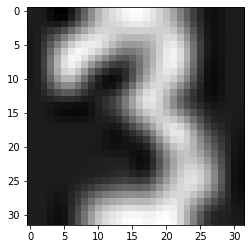

I think that digit is: 9


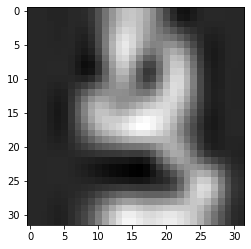

I think that digit is: 1


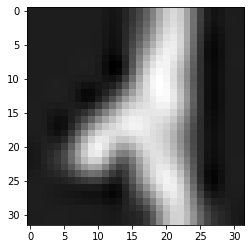

I think that digit is: 6


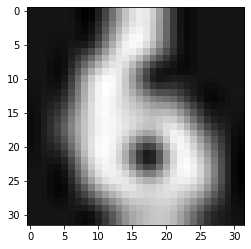

I think that digit is: 7


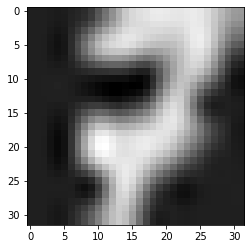

In [23]:
from skimage import exposure
import imutils
import numpy as np
import cv2
from matplotlib import pyplot as plt


model = knn

# loop over a few random digits
for i in list(map(int, np.random.randint(0, high=len(y_test), size=(5,)))):
	# grab the image and classify it
	image = X_test[i]
	prediction = model.predict(image.reshape(1, -1))[0]

	# convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
	# then resize it to 32 x 32 pixels so we can see it better
	image = image.reshape((8, 8)).astype("uint8")
	image = exposure.rescale_intensity(image, out_range=(0, 255))
	image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

	# show the prediction
	print("I think that digit is: {}".format(prediction))
	plt.imshow(image, cmap="gray")
	plt.show()
	#cv2.imshow("Image", image)
	#cv2.waitKey(0)

Tente ajustar os hiperparâmetros dos modelos de KNN e árvore de decisão para melhorar ainda mais a performance dos modelos.

Tente aplicar os modelos em outros conjuntos de dados de classificação para ver como eles se saem.

Pesquise sobre outros modelos de classificação e compare-os com o KNN e árvore de decisão. Qual modelo é o mais adequado para diferentes tipos de problemas de classificação?